<a href="https://colab.research.google.com/github/Dimildizio/Adjuface/blob/main/gans/DiffFace_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiffFace inferencing

[github](https://github.com/hxngiee/DiffFace)

https://hxngiee.github.io/DiffFace/

[arxiv](https://arxiv.org/abs/2212.13344)

## Imports

In [ ]:
import os

from google.colab import files
from IPython.display import Image, display

## Install dependencies

In [ ]:
!pip install torch==0.11.0 torchvision==0.12.0 torchaudio==0.11.0
!pip install -r requirements.txt

## Clone repo

In [ ]:
!git clone https://github.com/hxngiee/DiffFace.git

## DIve into directory

In [ ]:
%cd DiffFace

## Patch errors

In [29]:
file_path = 'optimization/image_editor.py'
old_class = '_2D'
working_class = 'TWO_D'

with open(file_path, 'r') as file:
    file_contents = file.read()

# Replace the old string with the new string
updated_contents = file_contents.replace(old_class, working_class)

# Write the updated contents back to the file
with open(file_path, 'w') as file:
    file.write(updated_contents)

## Upload data

### Content image to take the facial features from

In [31]:
%cd data/src
uploaded_src = files.upload()
%cd ..

/content/DiffFace/data/src


Saving dale.png to dale.png


### Target image to put the content face on

In [ ]:
%cd targ
uploaded_src = files.upload()

In [ ]:
%cd ../.. # get back to root

## Create dir for weights

In [ ]:
!mkdir checkpoints

## Download weights

In [ ]:
!wget --header="Host: gisto365-my.sharepoint.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,ru;q=0.8" --header="Referer: https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints%2FArcface%2Etar&parent=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints" --header="Cookie: FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjEzLDBoLmZ8bWVtYmVyc2hpcHx1cm4lM2FzcG8lM2Fhbm9uI2ZhNWViNWVhODE4NTAzNmM1MGZmYTk0ODkyNDAxZDBlNzg5ZmQzMmY1OTY2MGRkOWNiNjZlZDRiNGQ2Njk3NTQsMCMuZnxtZW1iZXJzaGlwfHVybiUzYXNwbyUzYWFub24jZmE1ZWI1ZWE4MTg1MDM2YzUwZmZhOTQ4OTI0MDFkMGU3ODlmZDMyZjU5NjYwZGQ5Y2I2NmVkNGI0ZDY2OTc1NCwxMzM0OTgxMDcxMTAwMDAwMDAsMCwxMzM0OTg5NjgxMTI5NzUxMzMsMC4wLjAuMCwyNTgsNzM0YzQ3MWYtYjczNC00NzZjLTg0YjAtM2QzYzZjZGNkMjhmLCwsYjgwMjAyYTEtNTA2OC0yMDAwLWQ3NmItN2JhODc5YTM5MjJmLGI4MDIwMmExLTUwNjgtMjAwMC1kNzZiLTdiYTg3OWEzOTIyZixoQVNXekNjUVRFKzl5NlR4TzNBT0FRLDAsMCwwLCwsLDI2NTA0Njc3NDM5OTk5OTk5OTksMCwsLCwsLCwwLCwxOTYxMzAsR0FkeFdYM3FnLXBsUDRlOVhCUDF5MTZpZmpVLFllZ3RkamdWN2NWUUdPZG8wNEFvRjJzUW41cExIbGdWcTlMZS9PR2ZXOHRJcndsUGUvbW5WV2JNVW1tOG13dmd6UFlWUUVuVmVLSld3emg3R0pmNlV4OE9WUUdFWWo5enFEOS9nWGJUaGNhMmZUcGJZT3hYeWZzbUpZRmQyR0ZQSDVKU0w5SVZGamltSGNMOU9aeHNPaFlobkJYMkZHbnJmanUwWVZVS3llSXdnZkpIY3NvMTBpYklMWjZMNDJZRm1OZjYvS1dtMlFqRUF0d2JvOTlDK1BDNmRtUlpYMnQ2WlBOZllEUzMyN3k5ZGxLcllsRU8wUW5iOS9OWkFxWjdxUENEaitmaCtMUHR2TVRJckZFMFVLbnF0RVZxRkR2SXFVYVNpc3hlUTAxVTNzUWg0MU5vQ2p4TjZxc21XaVZZbjNoZmQzYldZTE1mS1BMKzF6WWlUdz09PC9TUD4=" --header="Connection: keep-alive" "https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/download.aspx?SourceUrl=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints%2FArcface%2Etar" -c -O 'checkpoints/Arcface.tar'
!wget --header="Host: gisto365-my.sharepoint.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,ru;q=0.8" --header="Referer: https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints%2FFaceParser%2Epth&parent=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints" --header="Cookie: FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjEzLDBoLmZ8bWVtYmVyc2hpcHx1cm4lM2FzcG8lM2Fhbm9uI2ZhNWViNWVhODE4NTAzNmM1MGZmYTk0ODkyNDAxZDBlNzg5ZmQzMmY1OTY2MGRkOWNiNjZlZDRiNGQ2Njk3NTQsMCMuZnxtZW1iZXJzaGlwfHVybiUzYXNwbyUzYWFub24jZmE1ZWI1ZWE4MTg1MDM2YzUwZmZhOTQ4OTI0MDFkMGU3ODlmZDMyZjU5NjYwZGQ5Y2I2NmVkNGI0ZDY2OTc1NCwxMzM0OTgxMDcxMTAwMDAwMDAsMCwxMzM0OTg5NjgxMTI5NzUxMzMsMC4wLjAuMCwyNTgsNzM0YzQ3MWYtYjczNC00NzZjLTg0YjAtM2QzYzZjZGNkMjhmLCwsYjgwMjAyYTEtNTA2OC0yMDAwLWQ3NmItN2JhODc5YTM5MjJmLGI4MDIwMmExLTUwNjgtMjAwMC1kNzZiLTdiYTg3OWEzOTIyZixoQVNXekNjUVRFKzl5NlR4TzNBT0FRLDAsMCwwLCwsLDI2NTA0Njc3NDM5OTk5OTk5OTksMCwsLCwsLCwwLCwxOTYxMzAsR0FkeFdYM3FnLXBsUDRlOVhCUDF5MTZpZmpVLFllZ3RkamdWN2NWUUdPZG8wNEFvRjJzUW41cExIbGdWcTlMZS9PR2ZXOHRJcndsUGUvbW5WV2JNVW1tOG13dmd6UFlWUUVuVmVLSld3emg3R0pmNlV4OE9WUUdFWWo5enFEOS9nWGJUaGNhMmZUcGJZT3hYeWZzbUpZRmQyR0ZQSDVKU0w5SVZGamltSGNMOU9aeHNPaFlobkJYMkZHbnJmanUwWVZVS3llSXdnZkpIY3NvMTBpYklMWjZMNDJZRm1OZjYvS1dtMlFqRUF0d2JvOTlDK1BDNmRtUlpYMnQ2WlBOZllEUzMyN3k5ZGxLcllsRU8wUW5iOS9OWkFxWjdxUENEaitmaCtMUHR2TVRJckZFMFVLbnF0RVZxRkR2SXFVYVNpc3hlUTAxVTNzUWg0MU5vQ2p4TjZxc21XaVZZbjNoZmQzYldZTE1mS1BMKzF6WWlUdz09PC9TUD4=" --header="Connection: keep-alive" "https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/download.aspx?SourceUrl=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints%2FFaceParser%2Epth" -c -O 'checkpoints/FaceParser.pth'
!wget --header="Host: gisto365-my.sharepoint.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,ru;q=0.8" --header="Referer: https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints" --header="Cookie: FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjEzLDBoLmZ8bWVtYmVyc2hpcHx1cm4lM2FzcG8lM2Fhbm9uI2ZhNWViNWVhODE4NTAzNmM1MGZmYTk0ODkyNDAxZDBlNzg5ZmQzMmY1OTY2MGRkOWNiNjZlZDRiNGQ2Njk3NTQsMCMuZnxtZW1iZXJzaGlwfHVybiUzYXNwbyUzYWFub24jZmE1ZWI1ZWE4MTg1MDM2YzUwZmZhOTQ4OTI0MDFkMGU3ODlmZDMyZjU5NjYwZGQ5Y2I2NmVkNGI0ZDY2OTc1NCwxMzM0OTgxMDcxMTAwMDAwMDAsMCwxMzM0OTg5NjgxMTI5NzUxMzMsMC4wLjAuMCwyNTgsNzM0YzQ3MWYtYjczNC00NzZjLTg0YjAtM2QzYzZjZGNkMjhmLCwsYjgwMjAyYTEtNTA2OC0yMDAwLWQ3NmItN2JhODc5YTM5MjJmLGI4MDIwMmExLTUwNjgtMjAwMC1kNzZiLTdiYTg3OWEzOTIyZixoQVNXekNjUVRFKzl5NlR4TzNBT0FRLDAsMCwwLCwsLDI2NTA0Njc3NDM5OTk5OTk5OTksMCwsLCwsLCwwLCwxOTYxMzAsR0FkeFdYM3FnLXBsUDRlOVhCUDF5MTZpZmpVLFllZ3RkamdWN2NWUUdPZG8wNEFvRjJzUW41cExIbGdWcTlMZS9PR2ZXOHRJcndsUGUvbW5WV2JNVW1tOG13dmd6UFlWUUVuVmVLSld3emg3R0pmNlV4OE9WUUdFWWo5enFEOS9nWGJUaGNhMmZUcGJZT3hYeWZzbUpZRmQyR0ZQSDVKU0w5SVZGamltSGNMOU9aeHNPaFlobkJYMkZHbnJmanUwWVZVS3llSXdnZkpIY3NvMTBpYklMWjZMNDJZRm1OZjYvS1dtMlFqRUF0d2JvOTlDK1BDNmRtUlpYMnQ2WlBOZllEUzMyN3k5ZGxLcllsRU8wUW5iOS9OWkFxWjdxUENEaitmaCtMUHR2TVRJckZFMFVLbnF0RVZxRkR2SXFVYVNpc3hlUTAxVTNzUWg0MU5vQ2p4TjZxc21XaVZZbjNoZmQzYldZTE1mS1BMKzF6WWlUdz09PC9TUD4=" --header="Connection: keep-alive" "https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/download.aspx?UniqueId=d6d2cfaf%2D0ef8%2D45e1%2D9da9%2D58114afa6a2c" -c -O 'checkpoints/GazeEstimator.pt'
!wget --header="Host: gisto365-my.sharepoint.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7" --header="Accept-Language: en-US,en;q=0.9,ru;q=0.8" --header="Referer: https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fhongieee%5Fgm%5Fgist%5Fac%5Fkr%2FDocuments%2FDiffFace%2Fcheckpoints" --header="Cookie: FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjEzLDBoLmZ8bWVtYmVyc2hpcHx1cm4lM2FzcG8lM2Fhbm9uI2ZhNWViNWVhODE4NTAzNmM1MGZmYTk0ODkyNDAxZDBlNzg5ZmQzMmY1OTY2MGRkOWNiNjZlZDRiNGQ2Njk3NTQsMCMuZnxtZW1iZXJzaGlwfHVybiUzYXNwbyUzYWFub24jZmE1ZWI1ZWE4MTg1MDM2YzUwZmZhOTQ4OTI0MDFkMGU3ODlmZDMyZjU5NjYwZGQ5Y2I2NmVkNGI0ZDY2OTc1NCwxMzM0OTgxMDcxMTAwMDAwMDAsMCwxMzM0OTg5NjgxMTI5NzUxMzMsMC4wLjAuMCwyNTgsNzM0YzQ3MWYtYjczNC00NzZjLTg0YjAtM2QzYzZjZGNkMjhmLCwsYjgwMjAyYTEtNTA2OC0yMDAwLWQ3NmItN2JhODc5YTM5MjJmLGI4MDIwMmExLTUwNjgtMjAwMC1kNzZiLTdiYTg3OWEzOTIyZixoQVNXekNjUVRFKzl5NlR4TzNBT0FRLDAsMCwwLCwsLDI2NTA0Njc3NDM5OTk5OTk5OTksMCwsLCwsLCwwLCwxOTYxMzAsR0FkeFdYM3FnLXBsUDRlOVhCUDF5MTZpZmpVLFllZ3RkamdWN2NWUUdPZG8wNEFvRjJzUW41cExIbGdWcTlMZS9PR2ZXOHRJcndsUGUvbW5WV2JNVW1tOG13dmd6UFlWUUVuVmVLSld3emg3R0pmNlV4OE9WUUdFWWo5enFEOS9nWGJUaGNhMmZUcGJZT3hYeWZzbUpZRmQyR0ZQSDVKU0w5SVZGamltSGNMOU9aeHNPaFlobkJYMkZHbnJmanUwWVZVS3llSXdnZkpIY3NvMTBpYklMWjZMNDJZRm1OZjYvS1dtMlFqRUF0d2JvOTlDK1BDNmRtUlpYMnQ2WlBOZllEUzMyN3k5ZGxLcllsRU8wUW5iOS9OWkFxWjdxUENEaitmaCtMUHR2TVRJckZFMFVLbnF0RVZxRkR2SXFVYVNpc3hlUTAxVTNzUWg0MU5vQ2p4TjZxc21XaVZZbjNoZmQzYldZTE1mS1BMKzF6WWlUdz09PC9TUD4=" --header="Connection: keep-alive" "https://gisto365-my.sharepoint.com/personal/hongieee_gm_gist_ac_kr/_layouts/15/download.aspx?UniqueId=88658313%2Dbbb4%2D45c4%2D8cd4%2D48b7f9e95f72" -c -O 'checkpoints/Model.pt'

## Run inference

In [27]:
!python main.py --output_path output/example

Using device: cuda:0
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.parallel.data_parallel.DataParallel' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.10/dist-packages/torch/serialization.py:786: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing 

In [24]:
#!rm -r /content/DiffFace/output  # remove results

## Show results

In [ ]:
folder_path = 'output/example/'
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

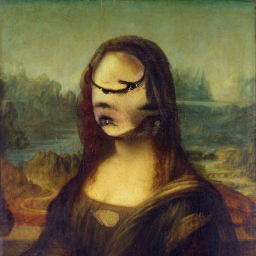

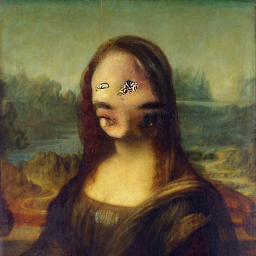

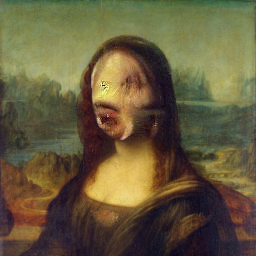

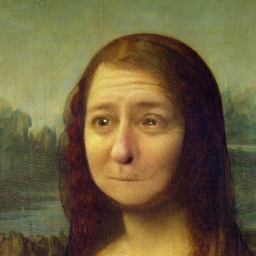

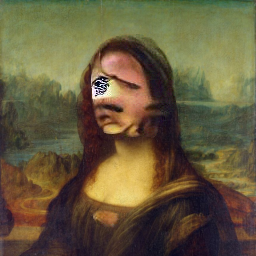

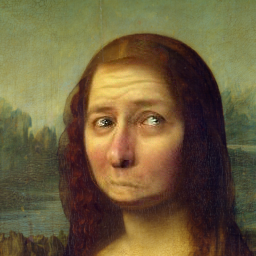

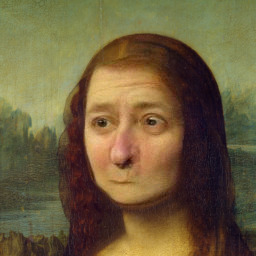

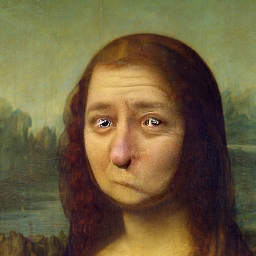

In [28]:
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    display(Image(filename=image_path))

## Check masks and feature transfer

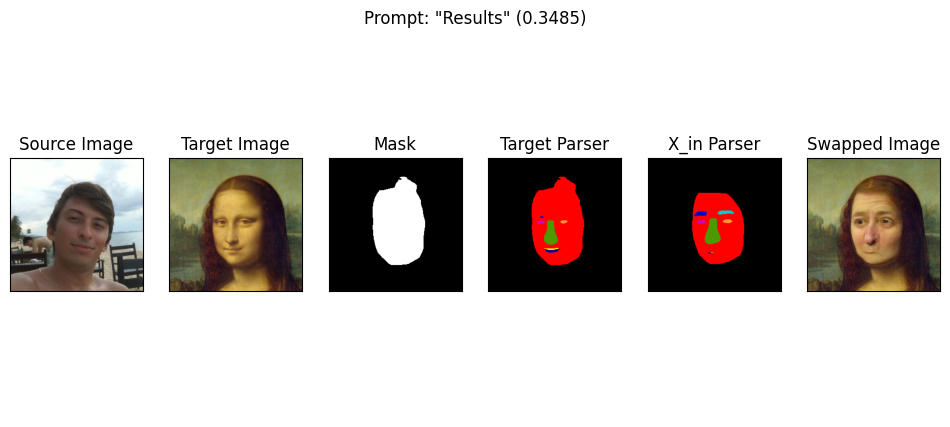

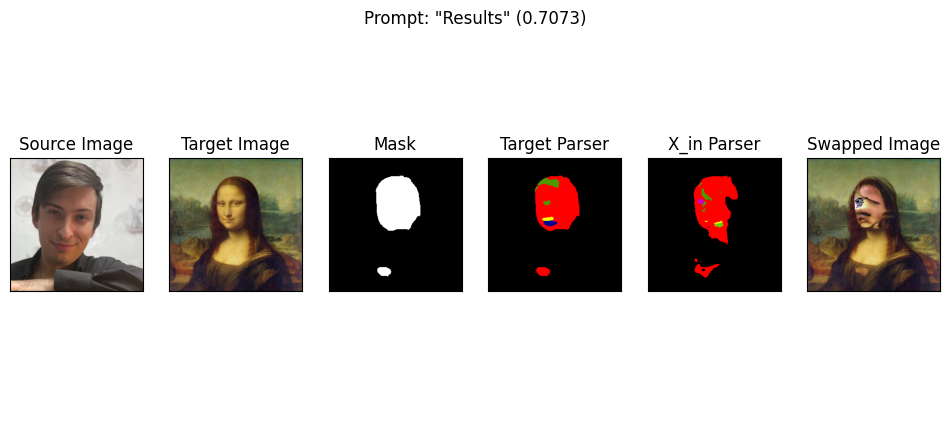

In [36]:
for x in range(2):
  image_path = os.path.join(folder_path+f'/{x}/', image_file)
  display(Image(filename=image_path))